In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd

In [23]:
directory = '/Users/mg/CloudStation/publications/2016/saner2016/data/'
technologies = ['jpa', 'jdbc', 'hibernate']

In [7]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

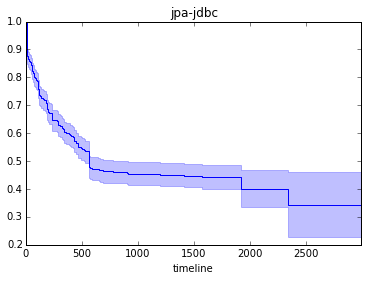

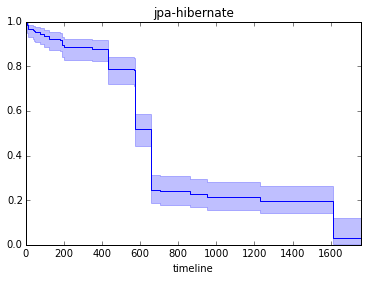

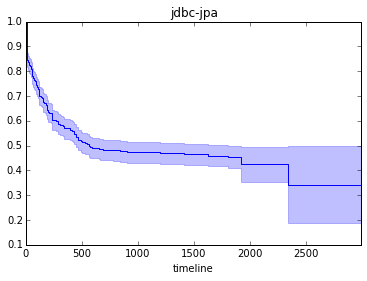

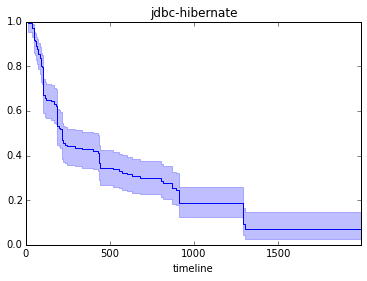

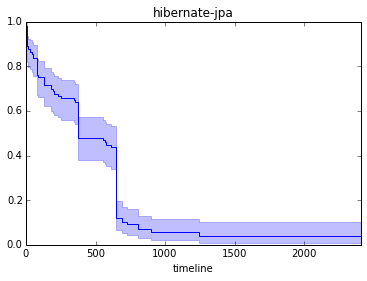

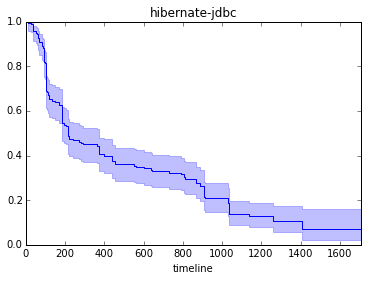

In [27]:
for t1 in technologies:
    for t2 in technologies:
        if t1 is not t2:
            data = pd.read_csv(directory + 'survival-' + t1 + '-' + t2 + '.csv')
            kmf.fit(data['duration'], data['event']).plot(title=t1 + '-' + t2, legend=False)